In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer,load_diabetes
from  sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import f1_score, recall_score, confusion_matrix, precision_score, accuracy_score, \
mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.datasets import load_iris, load_wine
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import os
import pickle
from sklearn.utils.multiclass import type_of_target
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
print("All Modules Loaded Successfully!!")

All Modules Loaded Successfully!!


In [2]:
#load dataset
Cars_df = pd.read_csv("Cars_Datasets_2025.csv" , encoding = "latin1")
Cars_df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [3]:
Student_df = pd.read_csv("Placement.csv")
Student_df["Placed"] = Student_df["Placed"].map({"Yes":1,"No":0})
Student_df.head()

,Student_ID,CGPA,Internships,Placed,Salary (INR LPA)
0,1,7.90,3,1,17.63
1,2,7.39,0,1,28.37
2,3,8.02,2,1,8.95
3,4,8.72,4,1,22.59
4,5,7.31,2,1,19.67


In [4]:
Order_df = pd.read_csv("restaurant_orders.csv")
Order_df.head()

,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56


In [5]:
CancerData = load_breast_cancer()
DiabetesData = load_diabetes()

In [6]:
cancer_df = pd.DataFrame(data = CancerData.data , columns = CancerData.feature_names)
cancer_df["target"] = CancerData.target
cancer_target_names = CancerData['target_names']
print(cancer_target_names)

['malignant' 'benign']


In [7]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [8]:
Diabetes_df = pd.DataFrame(data = DiabetesData.data , columns = DiabetesData.feature_names)
Diabetes_df["target"] = DiabetesData["target"]
# Diabetes_target_names =  DiabetesData['target_name']
# print(Diabetes_target_names)
Diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [9]:
Cars_df.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

In [10]:
Student_df.isnull().sum()

Student_ID          0
CGPA                0
Internships         0
Placed              0
Salary (INR LPA)    0
dtype: int64

In [11]:
Order_df.isnull().sum()

Order ID          0
Customer Name     0
Food Item         0
Category          0
Quantity          0
Price             0
Payment Method    0
Order Time        0
dtype: int64

In [12]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [13]:
Diabetes_df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [14]:
Diabetes_df.shape

(442, 11)

In [15]:
cancer_df.shape

(569, 31)

In [16]:
Cars_df.shape

(1218, 11)

In [17]:
Order_df.shape

(500, 8)

In [18]:
Student_df.shape

(1000, 5)

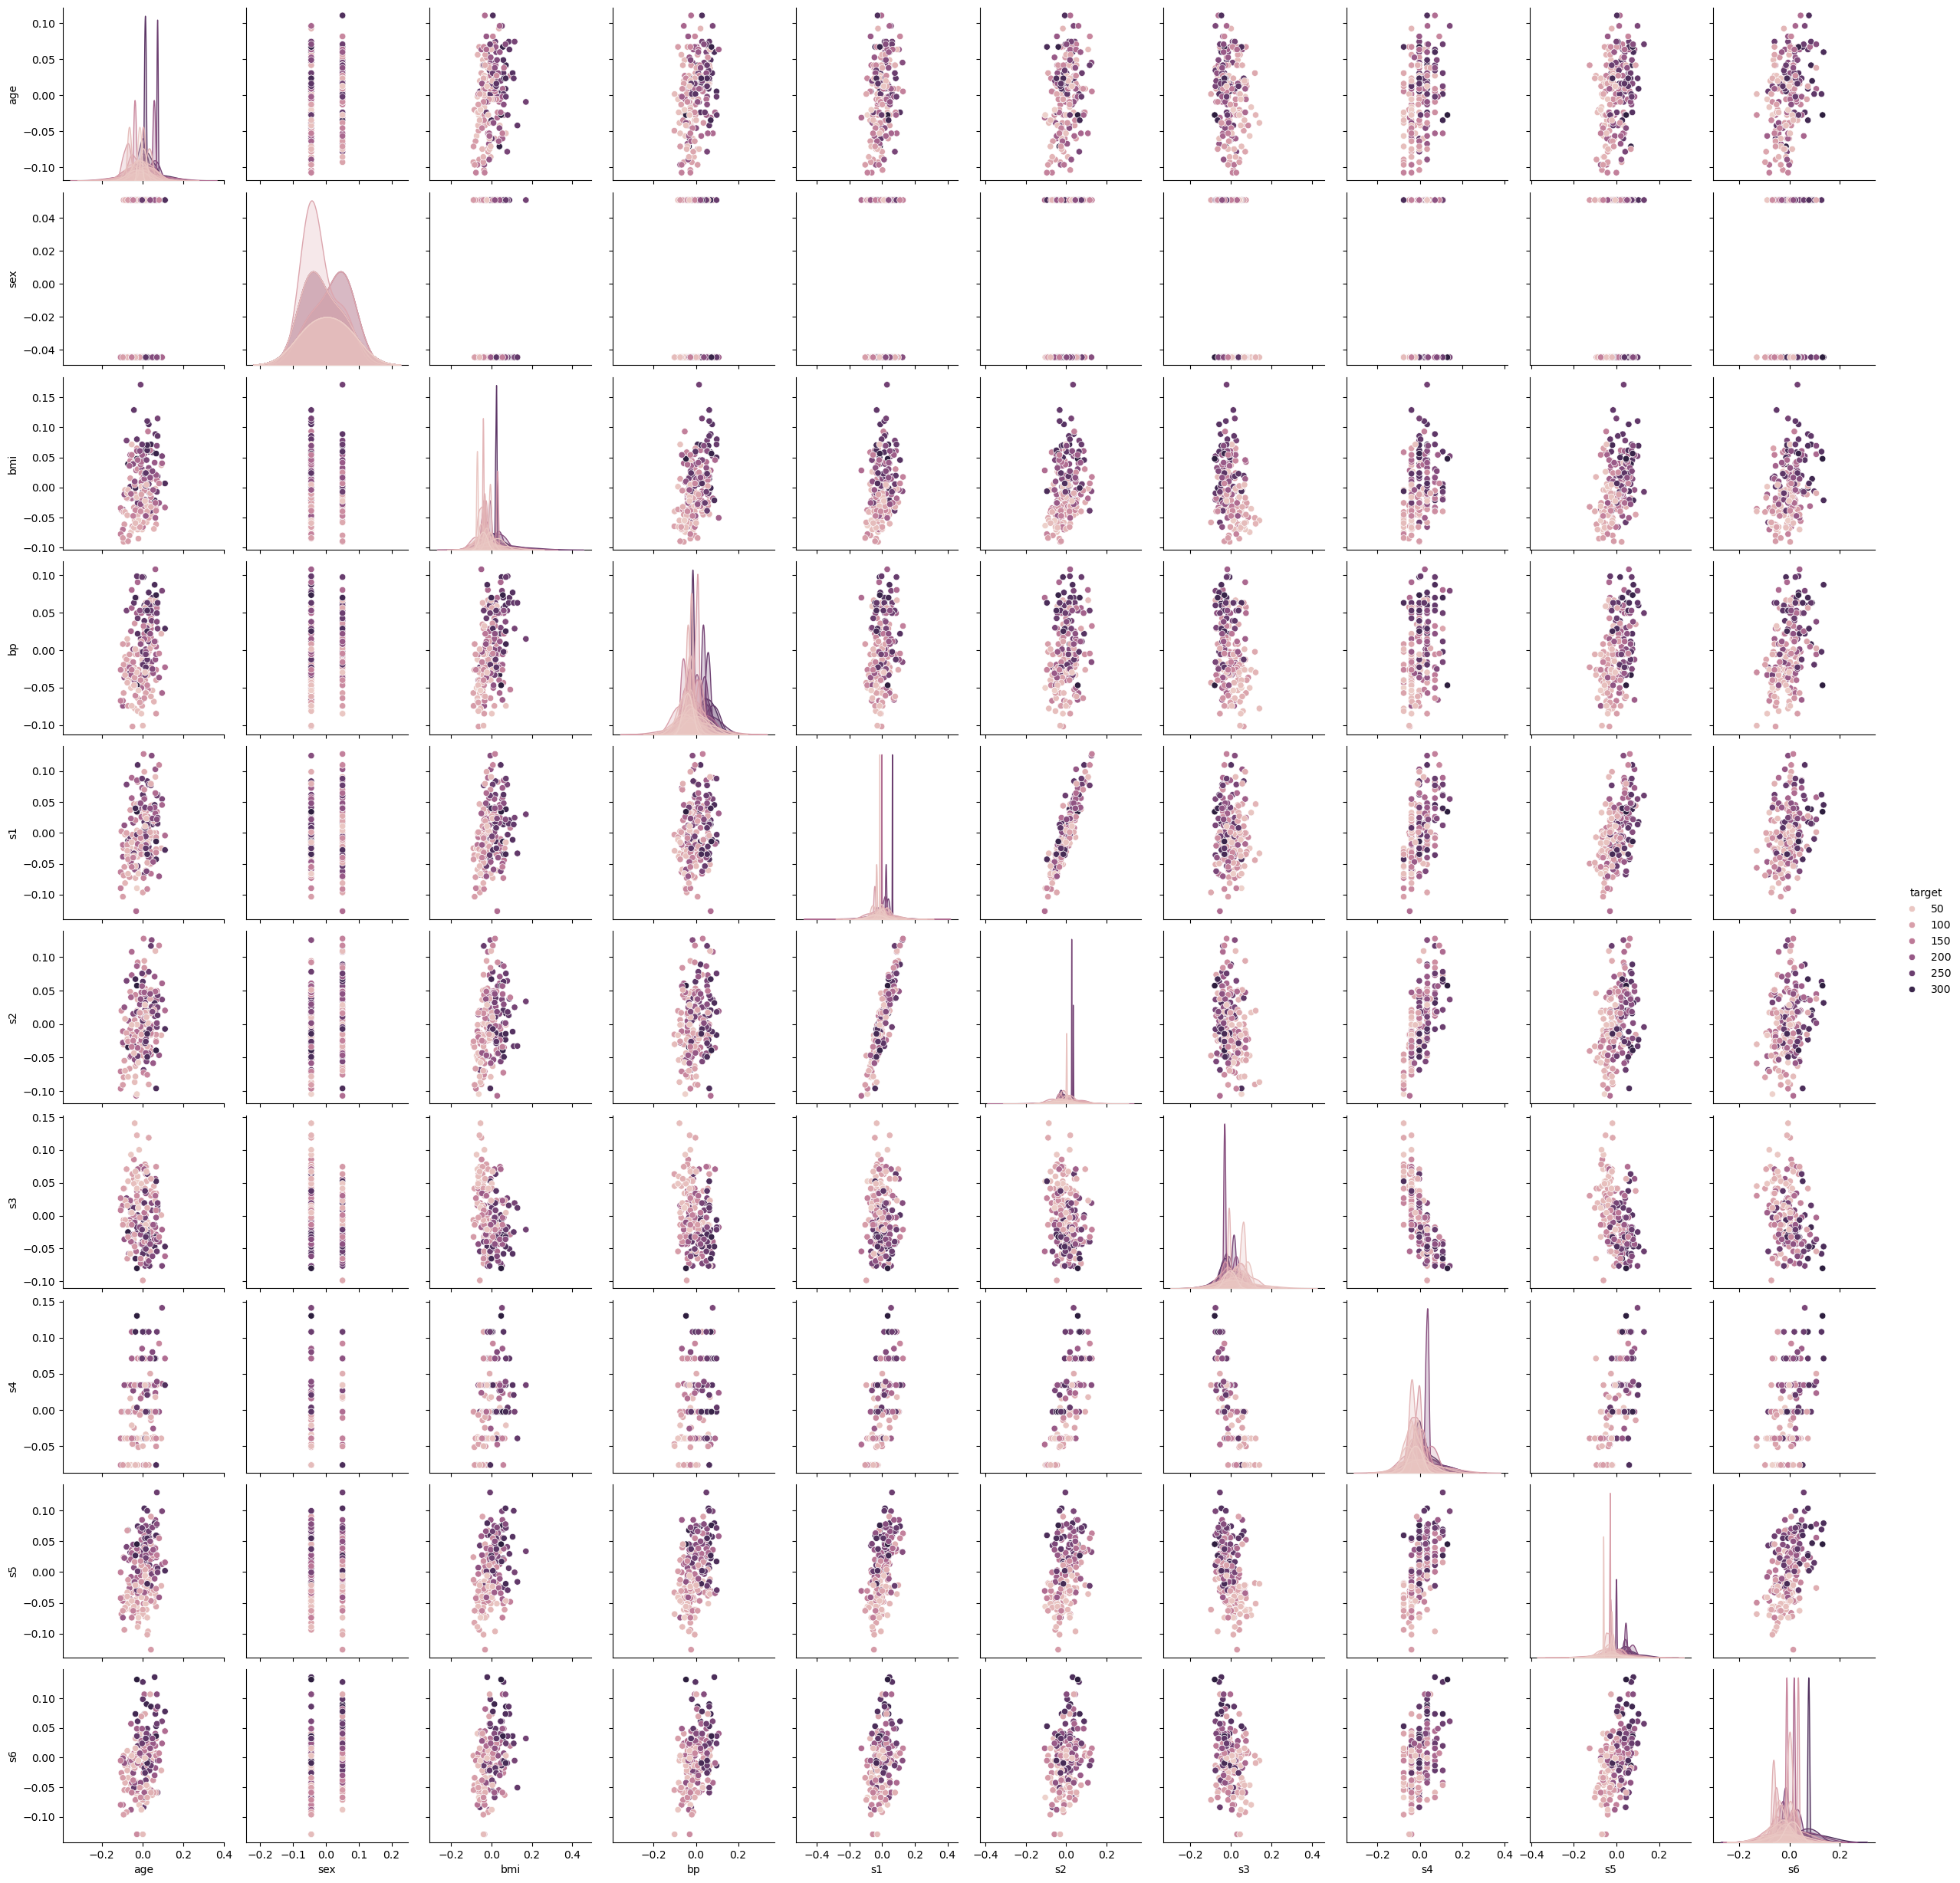

In [19]:
#visuals
diabetes_sample =  Diabetes_df.sample(n=200, random_state=42)
sns.pairplot(diabetes_sample, hue = 'target')
plt.show()

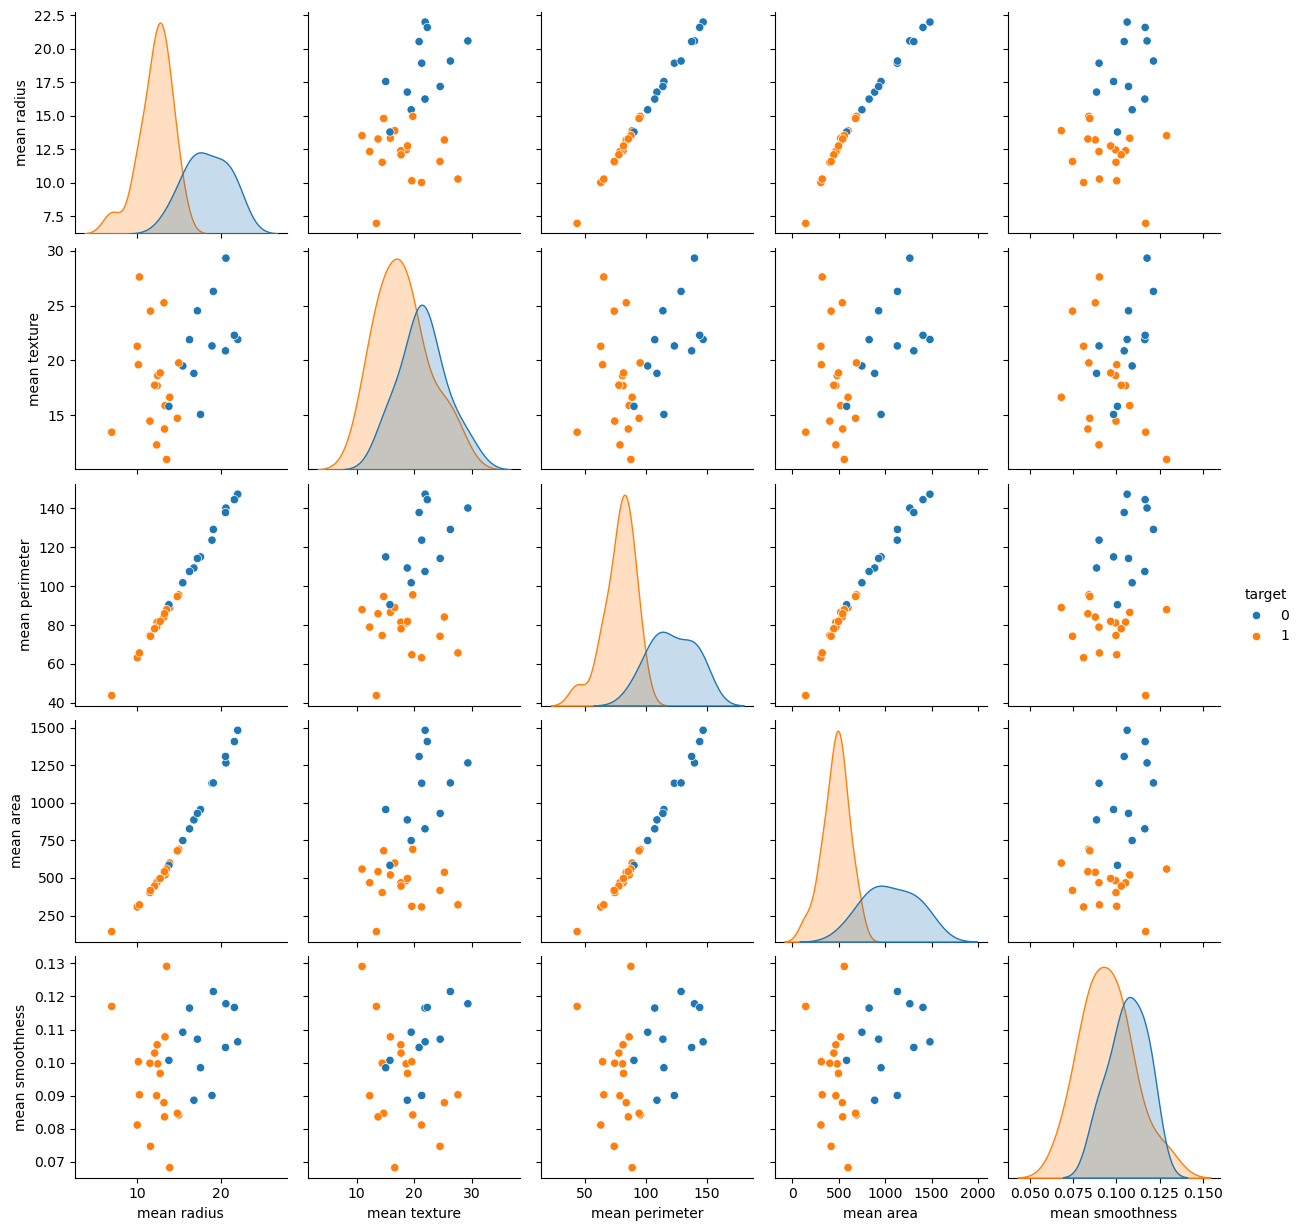

In [20]:
sample_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']

csample_df = cancer_df[sample_cols].sample(n=30, random_state=42)

sns.pairplot(data=csample_df, hue='target')
plt.show()

In [21]:
Cars_df.columns

Index(['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity',
       'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices',
       'Fuel Types', 'Seats', 'Torque'],
      dtype='object')

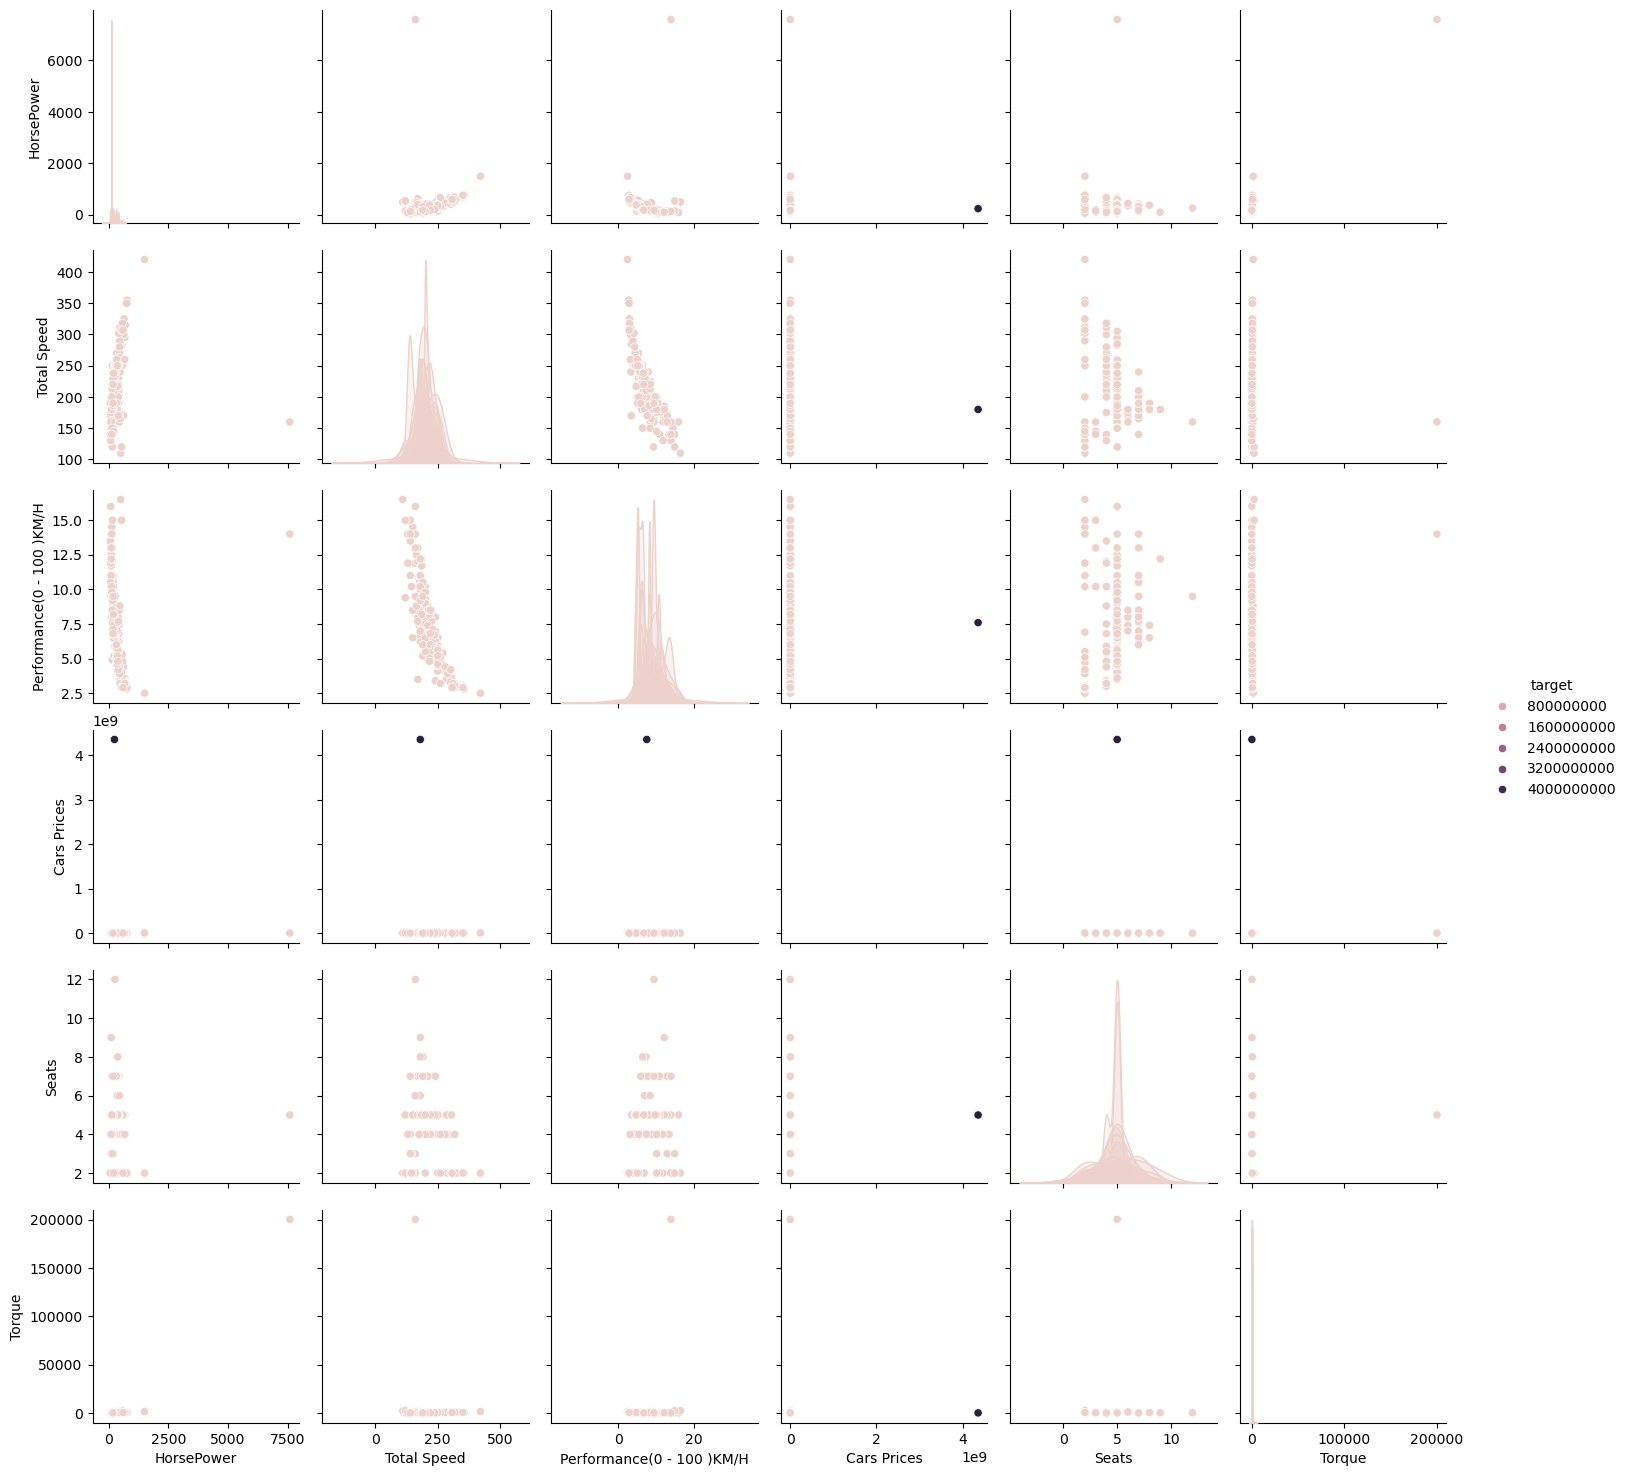

In [22]:
clean_df = Cars_df.copy()

# --- Clean Prices ---
clean_df['Cars Prices'] = clean_df['Cars Prices'].str.replace(r'[^0-9\-]', '', regex=True)
clean_df['Cars Prices'] = clean_df['Cars Prices'].str.split('-').str[0]
clean_df['Cars Prices'] = pd.to_numeric(clean_df['Cars Prices'], errors='coerce')

# --- Clean HorsePower ---
clean_df['HorsePower'] = clean_df['HorsePower'].str.replace(r'[^0-9\-]', '', regex=True)
clean_df['HorsePower'] = clean_df['HorsePower'].str.split('-').str[0]
clean_df['HorsePower'] = pd.to_numeric(clean_df['HorsePower'], errors='coerce')

# --- Clean Total Speed ---
clean_df['Total Speed'] = clean_df['Total Speed'].str.replace(r'[^0-9]', '', regex=True)
clean_df['Total Speed'] = pd.to_numeric(clean_df['Total Speed'], errors='coerce')

# --- Clean Performance 0-100 ---
clean_df['Performance(0 - 100 )KM/H'] = clean_df['Performance(0 - 100 )KM/H'].str.replace(r'[^0-9\.]', '', regex=True)
clean_df['Performance(0 - 100 )KM/H'] = pd.to_numeric(clean_df['Performance(0 - 100 )KM/H'], errors='coerce')

# --- Clean Torque ---
clean_df['Torque'] = clean_df['Torque'].str.replace(r'[^0-9\-]', '', regex=True)
clean_df['Torque'] = clean_df['Torque'].str.split('-').str[0]
clean_df['Torque'] = pd.to_numeric(clean_df['Torque'], errors='coerce')

# --- Clean Seats ---
clean_df['Seats'] = pd.to_numeric(clean_df['Seats'], errors='coerce')

# Add Target column (High if price >= median, else Low)
median_price = clean_df['Cars Prices'].median()
# clean_df['Target'] = np.where(clean_df['Cars Prices'] >= median_price, 'High', 'Low')
clean_df['target'] = clean_df['Cars Prices']

# Pairplot
num_cols = ['Cars Prices', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Torque', 'Seats', 'Target']


Cars_sample_df = clean_df.sample(n=200, random_state=42)

# sns.pairplot(
#     sample_df,
#     y_vars=['Cars Prices'],
#     x_vars=num_cols,
#     hue="Target",
#     height=4
# )
plt.show()
sns.pairplot(Cars_sample_df, hue="target")
plt.show()

In [23]:
clean_df['target'].head()

0    1100000.0
1     460000.0
2      12000.0
3     161000.0
4     253290.0
Name: target, dtype: float64

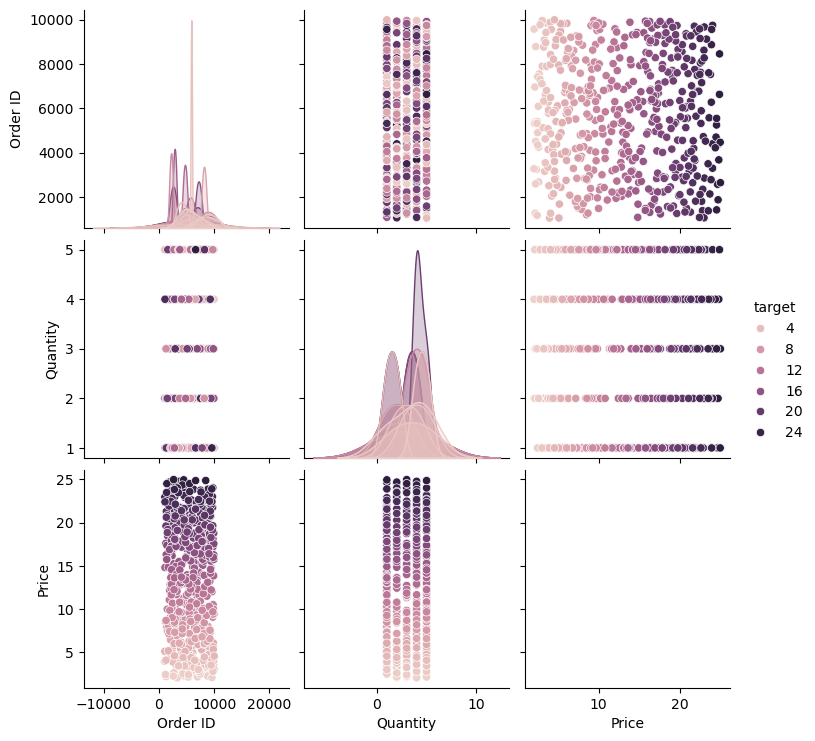

In [24]:
## Target is the Price itself
Order_df["target"] = Order_df["Price"]

# Sample for plotting
order_sample = Order_df.sample(n=500, random_state=42)

# Pairplot between numeric features and target (Price)
# numeric_cols = ["Food Item","Quantity", "Category", "target"]
# sns.pairplot(order_sample[numeric_cols],hue="target", diag_kind="hist")
# sns.pairplot(order_sample[numeric_cols], hue="target")

sns.pairplot(order_sample, hue="target")
plt.show()


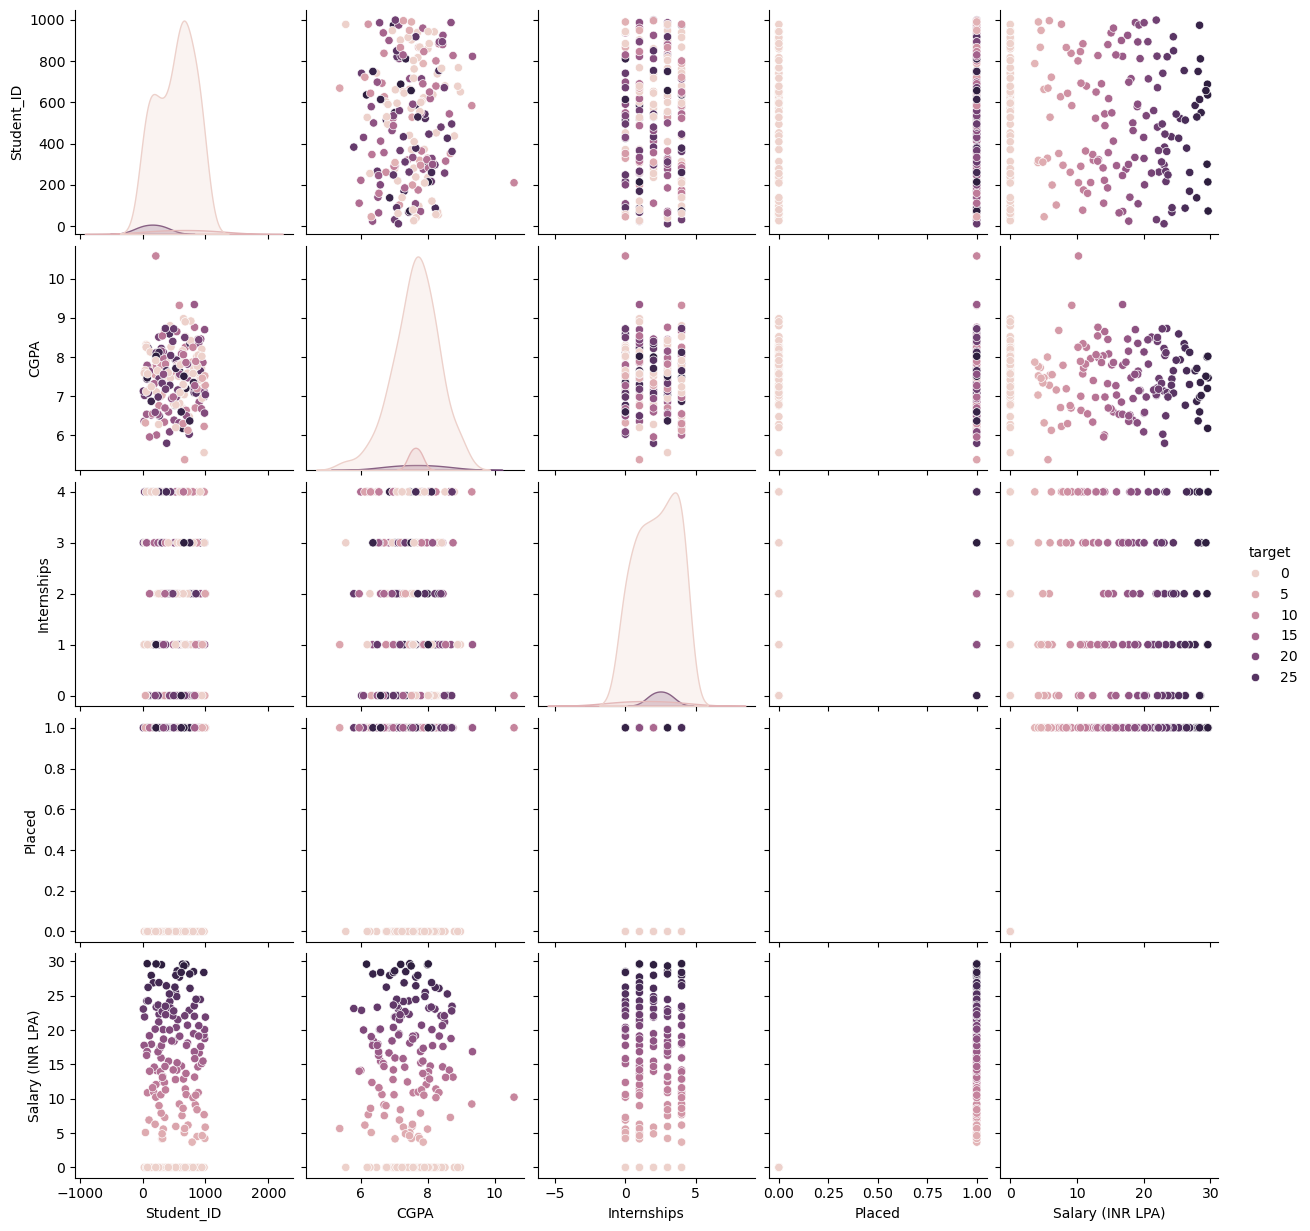

In [25]:
Student_df["target"] = Student_df["Salary (INR LPA)"]
student_sample =  Student_df.sample(n=200, random_state=42)
sns.pairplot(student_sample , hue = 'target')
plt.show()

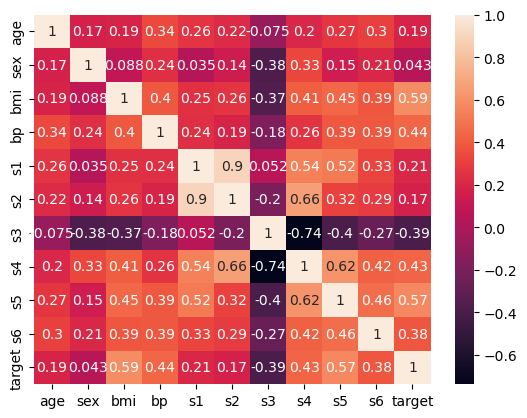

In [26]:
sns.heatmap(Diabetes_df.corr(),annot = True)
plt.show()

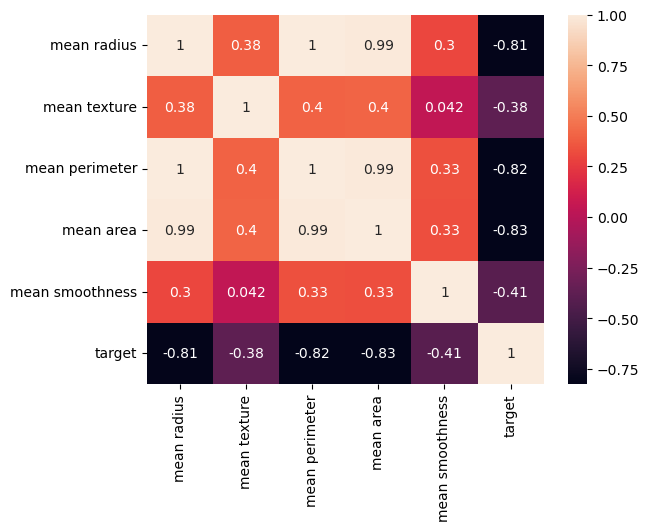

In [27]:
sns.heatmap(csample_df.corr(),annot = True)
plt.show()

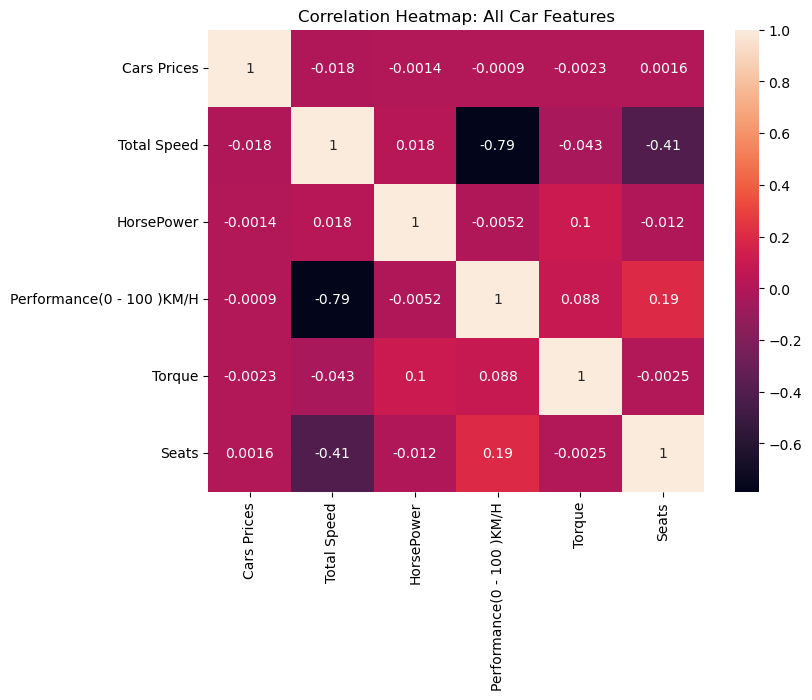

In [28]:
carheatmap_df = clean_df[['Cars Prices', 'Total Speed', 'HorsePower', 
                       'Performance(0 - 100 )KM/H', 'Torque', 'Seats']].dropna()

plt.figure(figsize=(8,6))
sns.heatmap(
    carheatmap_df.corr(),
    annot=True,)
plt.title("Correlation Heatmap: All Car Features")
plt.show()

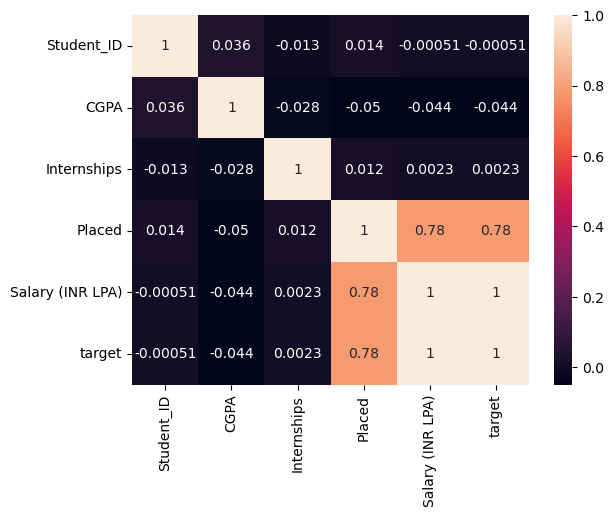

In [29]:
sns.heatmap(Student_df.corr(),annot = True)
plt.show()

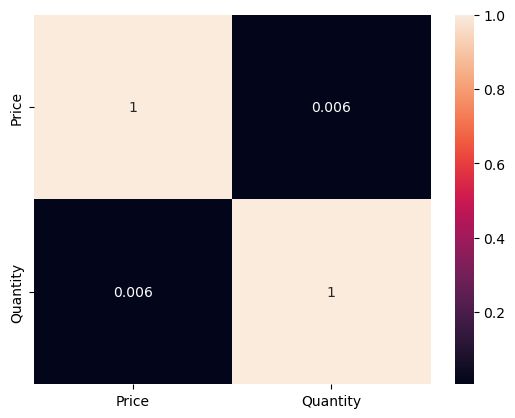

In [30]:
Orderheatmap = order_sample[["Price","Quantity"]].dropna()
sns.heatmap(Orderheatmap.corr(),annot = True)
plt.show()

In [32]:
stu_copy = Student_df.copy()
stu_copy = stu_copy.drop(['Salary (INR LPA)','Student_ID',],axis=1)
stu_copy


,CGPA,Internships,Placed,target
0,7.90,3,1,17.63
1,7.39,0,1,28.37
2,8.02,2,1,8.95
3,8.72,4,1,22.59
4,7.31,2,1,19.67
...,...,...,...,...
995,7.28,2,1,5.86
996,8.94,3,1,26.57
997,8.01,0,1,17.12
998,7.04,2,1,21.89


In [38]:
car_copy = clean_df.copy()
car_copy = car_copy.drop(['CC/Battery Capacity','Torque',"Cars Prices"],axis=1)
car_copy


,Company Names,Cars Names,Engines,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Fuel Types,Seats,target
0,FERRARI,SF90 STRADALE,V8,963,340,2.5,plug in hyrbrid,2.0,1.100000e+06
1,ROLLS ROYCE,PHANTOM,V12,563,250,5.3,Petrol,5.0,4.600000e+05
2,Ford,KA+,1.2L Petrol,70,165,10.5,Petrol,5.0,1.200000e+04
3,MERCEDES,GT 63 S,V8,630,250,3.2,Petrol,4.0,1.610000e+05
4,AUDI,AUDI R8 Gt,V10,602,320,3.6,Petrol,2.0,2.532900e+05
...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,240,180,7.6,Hybrid (Gas + Electric),5.0,4.359048e+09
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),326,180,6.8,Hybrid,7.0,5.000000e+04
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,169196,190,NaN,Gas / Hybrid,5.0,2.521029e+09
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,140198,180,NaN,Hybrid,5.0,3.300000e+04


In [47]:
orderdata_copy=Order_df[['Food Item',"Category",'Quantity', 'target']].dropna()
orderdata_copy

,Food Item,Category,Quantity,target
0,Pasta,Main,5,16.52
1,Brownie,Dessert,4,17.27
2,Pasta,Main,1,3.37
3,Pasta,Main,5,2.20
4,Soup,Starter,1,12.23
...,...,...,...,...
495,Pizza,Main,1,21.31
496,Soup,Starter,3,15.99
497,Pasta,Main,2,8.54
498,Soup,Starter,5,20.54


In [52]:
print(load_diabetes()["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [53]:
print(load_breast_cancer()["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [54]:
car_copy.dropna(inplace=True)
car_new = pd.get_dummies(car_copy,drop_first=True,dtype = int)
car_new

,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Seats,target,Company Names_AUDI,Company Names_Acura,Company Names_BENTLEY,Company Names_BMW,Company Names_Bugatti,...,Fuel Types_Hydrogen,Fuel Types_Petrol,"Fuel Types_Petrol, Diesel","Fuel Types_Petrol, Hybrid",Fuel Types_Petrol/AWD,Fuel Types_Petrol/Diesel,Fuel Types_Petrol/EV,Fuel Types_Petrol/Hybrid,Fuel Types_Plug-in Hybrid,Fuel Types_plug in hyrbrid
0,963,340,2.5,2.0,1.100000e+06,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,563,250,5.3,5.0,4.600000e+05,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,70,165,10.5,5.0,1.200000e+04,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,630,250,3.2,4.0,1.610000e+05,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,602,320,3.6,2.0,2.532900e+05,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,135,175,12.0,4.0,2.500000e+04,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1211,200,220,8.0,5.0,3.000000e+04,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1212,700,320,3.5,1.0,5.000000e+06,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1213,240,180,7.6,5.0,4.359048e+09,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
orderdata_copy.dropna(inplace=True)
order_new = pd.get_dummies(orderdata_copy,drop_first=True,dtype = int)
order_new


,Quantity,target,Food Item_Burger,Food Item_Cake,Food Item_Fries,Food Item_Ice Cream,Food Item_Pasta,Food Item_Pizza,Food Item_Salad,Food Item_Soup,Category_Main,Category_Starter
0,5,16.52,0,0,0,0,1,0,0,0,1,0
1,4,17.27,0,0,0,0,0,0,0,0,0,0
2,1,3.37,0,0,0,0,1,0,0,0,1,0
3,5,2.20,0,0,0,0,1,0,0,0,1,0
4,1,12.23,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,21.31,0,0,0,0,0,1,0,0,1,0
496,3,15.99,0,0,0,0,0,0,0,1,0,1
497,2,8.54,0,0,0,0,1,0,0,0,1,0
498,5,20.54,0,0,0,0,0,0,0,1,0,1


In [56]:
cancer_scaler = MinMaxScaler()

In [57]:
cancer_df[['mean radius',	'mean texture','area error',	'mean perimeter',	'mean area','worst texture'	,'worst perimeter'	,'worst area','worst radius']] = cancer_scaler.fit_transform(cancer_df[['mean radius',	'mean texture',	'mean perimeter','area error',	'mean area','worst texture'	,'worst perimeter'	,'worst area','worst radius']])

In [58]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.273811,0.363733,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.141525,0.668310,0.450698,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,0.643144,0.272574,0.125660,0.501591,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.303571,0.539818,0.435214,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,0.601496,0.390260,0.162922,0.449417,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.360075,0.508442,0.374508,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,0.210090,0.360839,0.038155,0.102906,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.385928,0.241347,0.094008,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,0.629893,0.156578,0.163688,0.489290,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.123934,0.506948,0.341575,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.283710,0.566490,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.383262,0.576174,0.452664,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,0.622320,0.626987,0.172279,0.474019,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.699094,0.520892,0.379915,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,0.455251,0.621238,0.077976,0.303118,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.589019,0.379949,0.230731,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,0.644564,0.663510,0.148335,0.475716,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.730277,0.668310,0.402035,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [151]:
# all_df = [car_new,stu_copy ,order_new ,Diabetes_df,cancer_df]
# all_df_name = ['car_df','student_df', 'Order_df', 'diabetesdf','cancerdf']

# classifier_models = [
#     LogisticRegression, SVC, KNeighborsClassifier,
#     GaussianNB, MultinomialNB, DecisionTreeClassifier, RandomForestClassifier
# ]
# classifier_names = [
#     'LogisticRegression','SVC','KNeighborsClassifier',
#     'GaussianNB','MultinomialNB','DecisionTreeClassifier','RandomForestClassifier'
# ]

# regressor_models = [
#      LinearRegression, SVR, KNeighborsRegressor,
#     DecisionTreeRegressor, RandomForestRegressor
# ]
# regressor_names = [
#     'LinearRegression','SVR','KNeighborsRegressor',
#     'DecisionTreeRegressor','RandomForestRegressor'
# ]

# temp_dict = {'Project_name':[],'ML Model Name':[],'Each Model Score':[], 'Model Brain':[]}


# def is_classification_target(y):
#     # If y is integer/str/categorical with few unique values → classification
#     if y.dtype == 'object' or pd.api.types.is_categorical_dtype(y):
#         return True
#     if pd.api.types.is_integer_dtype(y) and y.nunique() < 20:  # small number of unique classes
#         return True
#     return False


# for j, i in enumerate(all_df):
#     X = i.iloc[:, :-1]
#     y = i.iloc[:, -1]

#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

#     # Detect target type - FIXED FOR DIABETES
#     target_type = type_of_target(y)
#     # If diabetes dataset (multiclass with many unique values), treat as regression
#     if all_df_name[j] == 'diabetesdf' and target_type == 'multiclass' and y.nunique() / len(y) > 0.3:
#         models, names = regressor_models, regressor_names
#     elif target_type in ['binary', 'multiclass']:
#         models, names = classifier_models, classifier_names
#     else:
#         models, names = regressor_models, regressor_names

#     # Train models
#     for k, ml_model in enumerate(models):
       
#             if names[k] == "LogisticRegression":  
#                 model = ml_model(max_iter=5000)
#             else:
#                 model = ml_model()
 
#             if names[k] == "MultinomialNB":
#                 X_train_nb = X_train - X_train.min().min()
#                 X_test_nb  = X_test - X_train.min().min()
#                 model.fit(X_train_nb, y_train)
#                 score = model.score(X_test_nb, y_test)
#             else:
#                 model.fit(X_train, y_train)
#                 score = model.score(X_test, y_test)

                
#             temp_dict['Project_name'].append(all_df_name[j])
#             temp_dict['ML Model Name'].append(names[k])
#             temp_dict['Each Model Score'].append(score)
#             temp_dict['Model Brain'].append(model)

      

# all_model_matrix = pd.DataFrame(temp_dict)
# all_model_matrix



# Assume all_df and all_df_name are defined earlier
# all_df = [car_new, stu_copy, order_new, Diabetes_df, cancer_df]
# all_df_name = ['car_df', 'student_df', 'order_df', 'diabetesdf', 'cancerdf']

classifier_models = [
    LogisticRegression, SVC, KNeighborsClassifier,
    GaussianNB, MultinomialNB, DecisionTreeClassifier, RandomForestClassifier
]
classifier_names = [
    'LogisticRegression', 'SVC', 'KNeighborsClassifier',
    'GaussianNB', 'MultinomialNB', 'DecisionTreeClassifier', 'RandomForestClassifier'
]
regressor_models = [
    LinearRegression, SVR, KNeighborsRegressor,
    DecisionTreeRegressor, RandomForestRegressor
]
regressor_names = [
    'LinearRegression', 'SVR', 'KNeighborsRegressor',
    'DecisionTreeRegressor', 'RandomForestRegressor'
]

temp_dict = {'Project_name': [], 'ML Model Name': [], 'Each Model Score': [], 'Model Brain': []}

# ✅ FIX: Removed 'encoded_columns_dict = {}' as it's no longer needed.

def is_classification_target(y):
    if y.dtype == 'object' or pd.api.types.is_categorical_dtype(y):
        return True
    if pd.api.types.is_integer_dtype(y) and y.nunique() < 20:
        return True
    return False

# ======================
# Training Loop
# ======================
for j, i in enumerate(all_df):
    X = i.iloc[:, :-1]
    y = i.iloc[:, -1]

    # ✅ FIX: Removed the manual 'pd.get_dummies' and 'encoded_columns_dict' saving.
    # The pipeline handles this automatically.

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    
    # Detect type
    target_type = type_of_target(y)
    
    if all_df_name[j] == 'diabetesdf' and target_type == 'multiclass' and y.nunique() / len(y) > 0.3:
        models, names = regressor_models, regressor_names
    elif target_type in ['binary', 'multiclass']:
        models, names = classifier_models, classifier_names
    else:
        models, names = regressor_models, regressor_names

    for k, ml_model in enumerate(models):
        # ======================
        # Build pipeline
        # ======================
        categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
        numeric_cols = X.select_dtypes(exclude=['object', 'bool']).columns
        
        preprocessor = ColumnTransformer(
            transformers=[
                # Handle unknown categories from user input gracefully
                ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols), 
                ("num", "passthrough", numeric_cols)
            ]
        )

        # Special case LogisticRegression
        if names[k] == "LogisticRegression":
            model = Pipeline(steps=[
                ("preprocessor", preprocessor),
                ("classifier", ml_model(max_iter=5000))
            ])
        # Special case MultinomialNB (needs non-negative features)
        elif names[k] == "MultinomialNB":
            model = Pipeline(steps=[
                ("preprocessor", preprocessor),
                ("classifier", ml_model())
            ])
        else:
            # Generic pipeline
            step_name = "classifier" if names[k] in classifier_names else "regressor"
            model = Pipeline(steps=[
                ("preprocessor", preprocessor),
                (step_name, ml_model())
            ])

        # --------------------------------------------------------------------
        # ✅ CRITICAL FIX: This block was de-indented.
        # It was previously inside the 'else' statement, meaning
        # LogisticRegression and MultinomialNB were never trained or saved.
        # Now, EVERY model will be trained and saved.
        # --------------------------------------------------------------------

        # Train model
        model.fit(X_train, y_train)
        
        # Score
        score = model.score(X_test, y_test)
        
        # Save to dictionary
        temp_dict['Project_name'].append(all_df_name[j])
        temp_dict['ML Model Name'].append(names[k])
        temp_dict['Each Model Score'].append(score)
        temp_dict['Model Brain'].append(model)
        
        # Save pipeline to file
        model_filename = all_df_name[j].replace("_df", "") + "_ml_brain.pkl"
        with open(model_filename, "wb") as f:
            pickle.dump(model, f)

# ✅ FIX: Removed the final saving of 'encoded_columns_dict.pkl'
# with open("encoded_columns_dict.pkl", "wb") as f:
#     pickle.dump(encoded_columns_dict, f)

# Final results DataFrame
all_model_matrix = pd.DataFrame(temp_dict)
all_model_matrix

,Project_name,ML Model Name,Each Model Score,Model Brain
0,car_df,LogisticRegression,1.000000,"(ColumnTransformer(transformers=[('cat', OneHo..."
1,car_df,SVC,1.000000,"(ColumnTransformer(transformers=[('cat', OneHo..."
2,car_df,KNeighborsClassifier,1.000000,"(ColumnTransformer(transformers=[('cat', OneHo..."
3,car_df,GaussianNB,1.000000,"(ColumnTransformer(transformers=[('cat', OneHo..."
4,car_df,MultinomialNB,0.008403,"(ColumnTransformer(transformers=[('cat', OneHo..."
5,car_df,DecisionTreeClassifier,1.000000,"(ColumnTransformer(transformers=[('cat', OneHo..."
6,car_df,RandomForestClassifier,1.000000,"(ColumnTransformer(transformers=[('cat', OneHo..."
7,student_df,LinearRegression,0.635604,"(ColumnTransformer(transformers=[('cat', OneHo..."
8,student_df,SVR,0.469192,"(ColumnTransformer(transformers=[('cat', OneHo..."
9,student_df,KNeighborsRegressor,0.515106,"(ColumnTransformer(transformers=[('cat', OneHo..."


In [153]:
final_ml_matrix = all_model_matrix.sort_values(by = ['Project_name','Each Model Score'],ascending = False).groupby('Project_name').head(1)
final_ml_matrix

,Project_name,ML Model Name,Each Model Score,Model Brain
7,student_df,LinearRegression,0.635604,"(ColumnTransformer(transformers=[('cat', OneHo..."
12,order_df,LogisticRegression,1.000000,"(ColumnTransformer(transformers=[('cat', OneHo..."
19,diabetesdf,LinearRegression,0.452603,"(ColumnTransformer(transformers=[('cat', OneHo..."
0,car_df,LogisticRegression,1.000000,"(ColumnTransformer(transformers=[('cat', OneHo..."
24,cancerdf,LogisticRegression,0.964912,"(ColumnTransformer(transformers=[('cat', OneHo..."


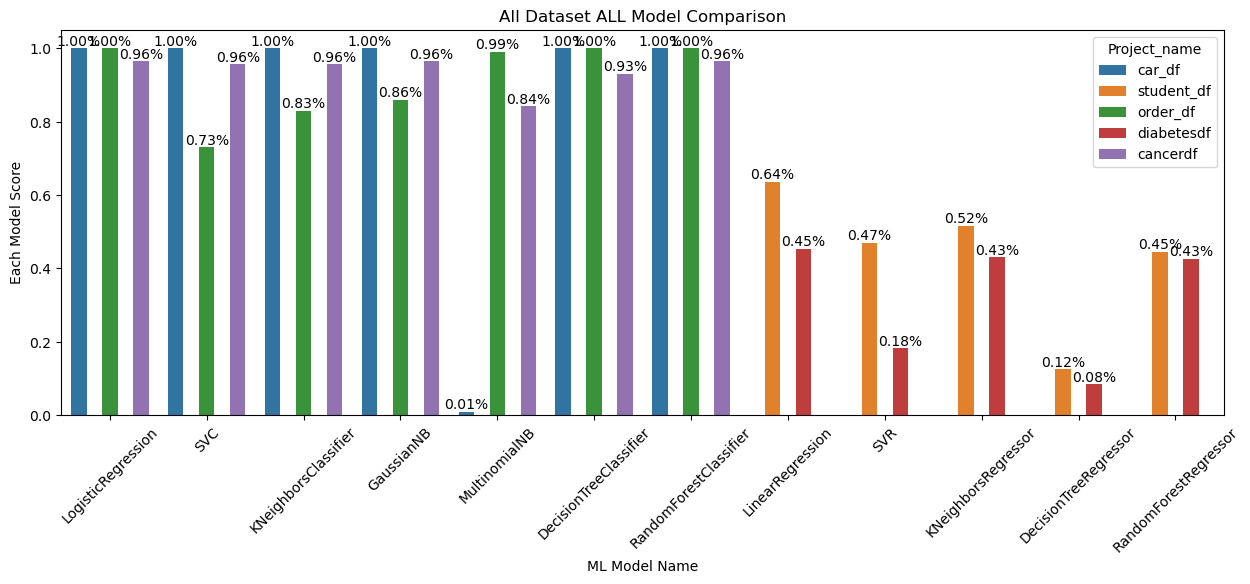

In [155]:
plt.figure(figsize=(15,5))
plt.title('All Dataset ALL Model Comparison')
ax = sns.barplot(data = all_model_matrix, x= 'ML Model Name', y = 'Each Model Score', hue = 'Project_name')
for i in ax.containers:
    plt.bar_label(i,fmt = '%.2f%%')
plt.xticks(rotation = 45)
plt.show()

In [156]:
#Model Save: using pickle, joblib

In [157]:
Student_model = final_ml_matrix['Model Brain'].values[0]
Student_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['CGPA', 'Internships', 'Placed'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [158]:
with open('Student_model_brain.pkl','wb') as f:
    pickle.dump(Student_model,f)
print('Done')

Done


In [163]:
for i in final_ml_matrix[['Project_name','Model Brain']].itertuples():
    index,name,brain = tuple(i)
    cleaned_name = name.replace('df','').replace('_','').replace('new','')
    # print(cleaned_name)
    with open(f'{cleaned_name}_ml_brain.pkl','wb') as f:
        pickle.dump(brain,f)
print('Best ML Model Saved Successfully!!')

Best ML Model Saved Successfully!!


In [164]:
sample_X = cancer_df.sample().iloc[:,:-1].values
with open('cancer_ml_brain.pkl','rb') as f:
    cancer_chatgpt = pickle.load(f)

In [167]:
# print(cancer_target_names)
sample_data = cancer_df.sample()
sample_X = sample_data.iloc[:,:-1]
sample_y = sample_data.iloc[:,-1]
print(sample_X.values,cancer_target_names[sample_y])
print("Model says:", cancer_target_names[cancer_chatgpt.predict(sample_X)[0]])

[[0.15802925 0.22455191 0.0115204  0.07694592 0.09434    0.04994
  0.01012    0.005495   0.1885     0.06201    0.2104     0.967
  1.356      0.14871122 0.007086   0.007247   0.01012    0.005495
  0.0156     0.002606   0.11810744 0.25986141 0.10314259 0.04908081
  0.1285     0.08842    0.04384    0.02381    0.2681     0.07399   ]] ['benign']
Model says: benign


In [169]:
os.getcwd()

'C:\\Users\\Saurabh Kumar\\Downloads\\Python folder\\Hybrid Project'

In [171]:
import streamlit as st

In [173]:
cancer_df.to_csv('Cancer',index = False)

In [175]:
Diabetes_df.to_csv('Diabetes',index = False)

In [177]:
car_copy.to_csv('Car',index = False)

In [179]:
orderdata_copy.to_csv('Order',index = False)

In [181]:
stu_copy.to_csv('Student',index = False)